Business Understanding

Data Understandin

In [2]:
import pandas as pd
import numpy as np
#Loading the training dataset
train_data = pd.read_csv("training_set_features.csv")

train_data.info()

train_data.describe()

test_data = pd.read_csv("test_set_features.csv")
training_labels = pd.read_csv("training_set_labels.csv")
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [3]:
test_data.describe()
test_data.info()
test_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26708 entries, 0 to 26707
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26708 non-null  int64  
 1   h1n1_concern                 26623 non-null  float64
 2   h1n1_knowledge               26586 non-null  float64
 3   behavioral_antiviral_meds    26629 non-null  float64
 4   behavioral_avoidance         26495 non-null  float64
 5   behavioral_face_mask         26689 non-null  float64
 6   behavioral_wash_hands        26668 non-null  float64
 7   behavioral_large_gatherings  26636 non-null  float64
 8   behavioral_outside_home      26626 non-null  float64
 9   behavioral_touch_face        26580 non-null  float64
 10  doctor_recc_h1n1             24548 non-null  float64
 11  doctor_recc_seasonal         24548 non-null  float64
 12  chronic_med_condition        25776 non-null  float64
 13  child_under_6_mo

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,26707,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"> $75,000",Not Married,Rent,Employed,mlyzmhmf,"MSA, Not Principle City",1.0,0.0,atmlpfrs,hfxkjkmi
1,26708,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,Non-MSA,3.0,0.0,atmlpfrs,xqwwgdyp
2,26709,2.0,2.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,...,"> $75,000",Married,Own,Employed,lrircsnp,Non-MSA,1.0,0.0,nduyfdeo,pvmttkik
3,26710,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,lrircsnp,"MSA, Not Principle City",1.0,0.0,NaN,NaN
4,26711,3.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,lzgpxyit,Non-MSA,0.0,1.0,fcxhlnwr,mxkfnird


In [4]:
training_labels.info()
training_labels.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   respondent_id     26707 non-null  int64
 1   h1n1_vaccine      26707 non-null  int64
 2   seasonal_vaccine  26707 non-null  int64
dtypes: int64(3)
memory usage: 626.1 KB


,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [5]:
#checking for similarities and or differences in our training and test sets
#this will confirm any missing columns, values or entries 
try:
    pd.testing.assert_frame_equal(train_data, test_data)
    print("The datasets are equal.")
except AssertionError as e:
    print("The datasets are NOT equal.")
    print(e)

The datasets are NOT equal.
DataFrame are different

DataFrame shape mismatch
[left]:  (26707, 36)
[right]: (26708, 36)


In [6]:
# Defining columns to drop
columns_to_drop = ["respondent_id", "h1n1_concern", "h1n1_knowledge", "doctor_recc_h1n1",
                   "opinion_h1n1_vacc_effective", "opinion_h1n1_risk", "opinion_h1n1_sick_from_vacc"]

# Droping columns if they exist in the DataFrame
train_data = train_data.drop(columns=[col for col in columns_to_drop if col in train_data.columns], axis=1)
test_data = test_data.drop(columns=[col for col in columns_to_drop if col in test_data.columns], axis=1)

# droping columns in the training labels DataFrame
training_labels_seasonal = training_labels.drop(columns=["respondent_id", "h1n1_vaccine"], axis=1)


#### chcking for missing values

In [7]:
#check for missing values
missing_values_train_features = train_data.isnull().sum()
missing_values_test_features = test_data.isnull().sum()
missing_values_train_labels = training_labels_seasonal.isnull().sum()

# Print summary of missing values
print("Missing values in training set features:\n", missing_values_train_features[missing_values_train_features > 0])
print("\nMissing values in test set features:\n", missing_values_test_features[missing_values_test_features > 0])
print("\nMissing values in training set labels:\n", missing_values_train_labels[missing_values_train_labels > 0])


Missing values in training set features:
 behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
education                       1407
income_poverty                  4423
marital_status                  1408
rent_or_own                     2042
employment_status               1463
household_adults                 249
household_children               249
employment_industry            13330
employment_occupation          13470
dtype: int64

Missing values in test set features:
 behavioral_antivir

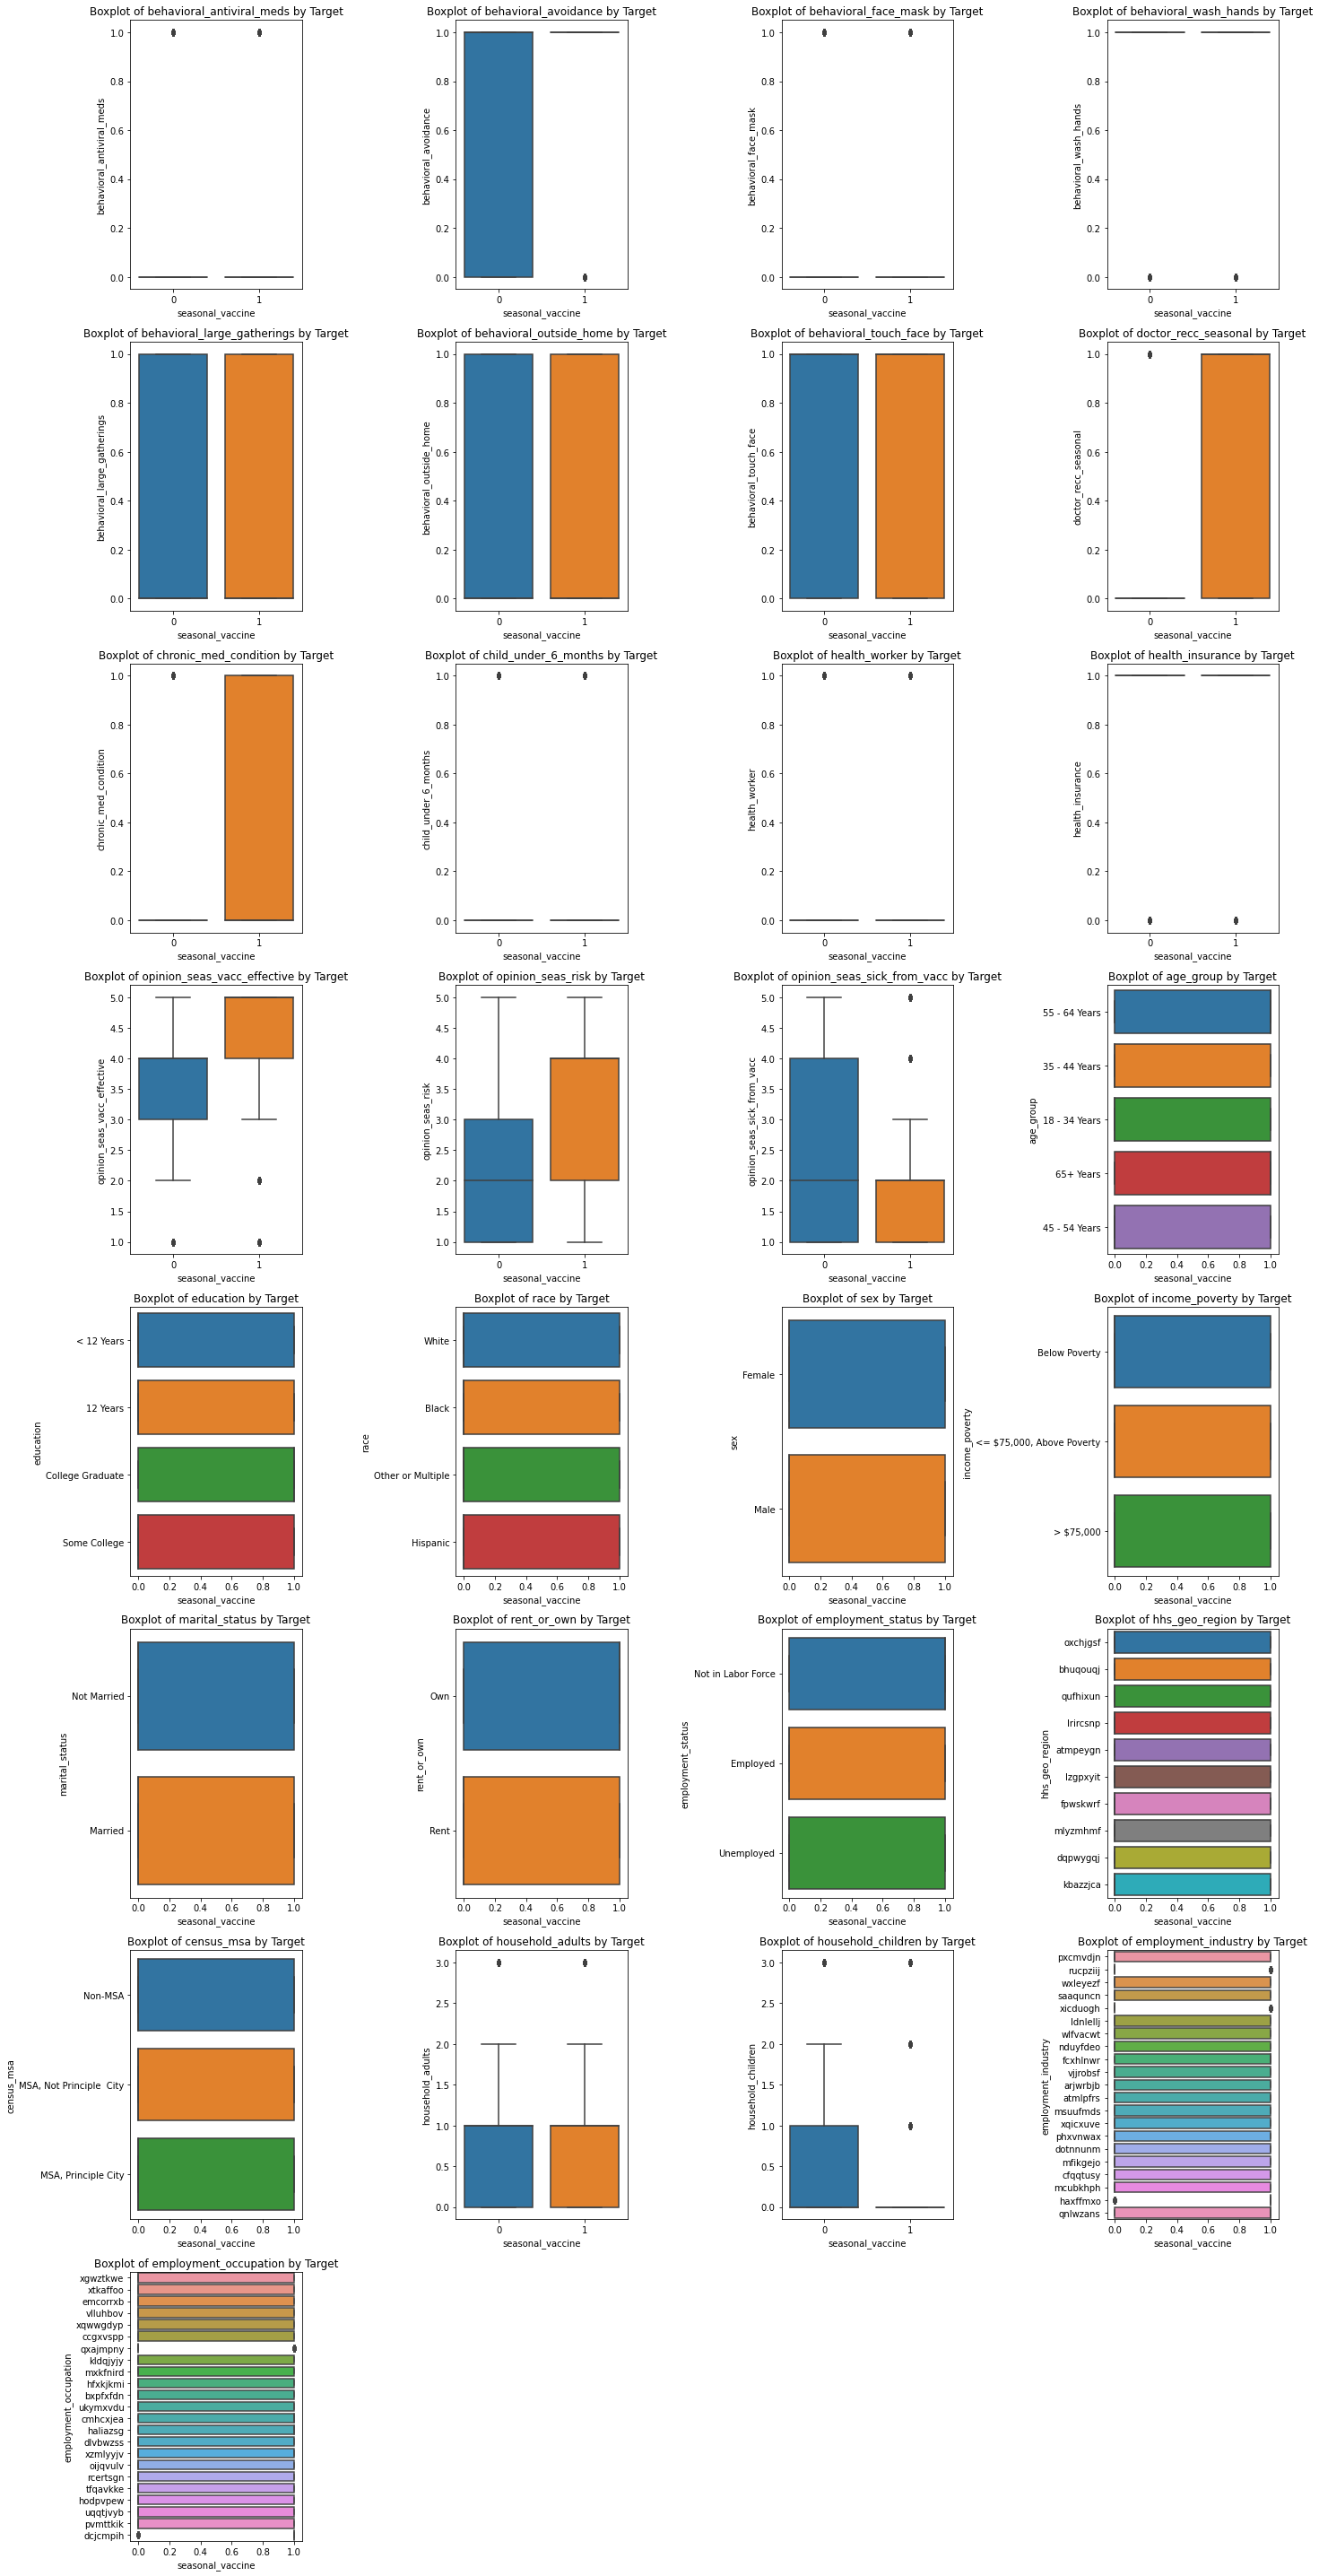

In [8]:
# Plotting outliers
import matplotlib.pyplot as plt
import seaborn as sns
import math

# combine features and target
X = train_data
y = training_labels_seasonal["seasonal_vaccine"]
combined_df = pd.concat([X, y], axis=1)

n_features = len(X.columns)
n_cols = 4  # Number of columns in the grid
n_rows = math.ceil(n_features / n_cols)  # Number of rows in the grid

plt.figure(figsize=(20, n_rows * 5))  # Adjust height based on number of rows

for i, column in enumerate(X.columns, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=y, y=combined_df[column])
    plt.title(f"Boxplot of {column} by Target")
plt.tight_layout()     
plt.show()

In [9]:
# Checking if any columns have unexpected data types or values
print("\nData types in training set features:\n", train_data.dtypes)
print("\nData types in test set features:\n", test_data.dtypes)


Data types in training set features:
 behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                             object
income_poverty                  object
marital_status                  object
rent_or_own                     object
employment_status               object
hhs_geo_region                  object
census_msa               

In [10]:
# Handling missing values or NaN values
from sklearn.impute import SimpleImputer

# Separating numerical and categorical features on training data
numerical_features = train_data.select_dtypes(include=['int64', 'float64'])
categorical_features = train_data.select_dtypes(include=['object'])

# Imputing numerical features with mean
numerical_imputer = SimpleImputer(strategy='mean')
train_data_num_imputed = pd.DataFrame(numerical_imputer.fit_transform(numerical_features), columns=numerical_features.columns)

# Imputing categorical features with mode
categorical_imputer = SimpleImputer(strategy='most_frequent')
train_data_cat_imputed = pd.DataFrame(categorical_imputer.fit_transform(categorical_features), columns=categorical_features.columns)

# Combining the imputed numerical and categorical features
imputed_train_features = pd.concat([train_data_num_imputed, train_data_cat_imputed], axis=1)

# Check if any missing values remain
print(imputed_train_features.isnull().sum().sum())  # Should print 0 if all NaNs are handled


# Separating numerical and categorical features on test data
numerical_test_features = test_data.select_dtypes(include=['int64', 'float64'])
categorical_test_features = test_data.select_dtypes(include=['object'])

# Imputing numerical features with mean
numerical_imputer = SimpleImputer(strategy='mean')
test_data_num_imputed = pd.DataFrame(numerical_imputer.fit_transform(numerical_test_features), columns=numerical_test_features.columns)

# Imputing categorical features with mode
categorical_test_imputer = SimpleImputer(strategy='most_frequent')
test_data_cat_imputed = pd.DataFrame(categorical_test_imputer.fit_transform(categorical_test_features), columns=categorical_test_features.columns)

# Combining the imputed numerical and categorical features
imputed_test_features = pd.concat([test_data_num_imputed, test_data_cat_imputed], axis=1)

# Check if any missing values remain
print(imputed_test_features.isnull().sum().sum())  # Should print 0 if all NaNs are handled



0
0


# Feature Selection

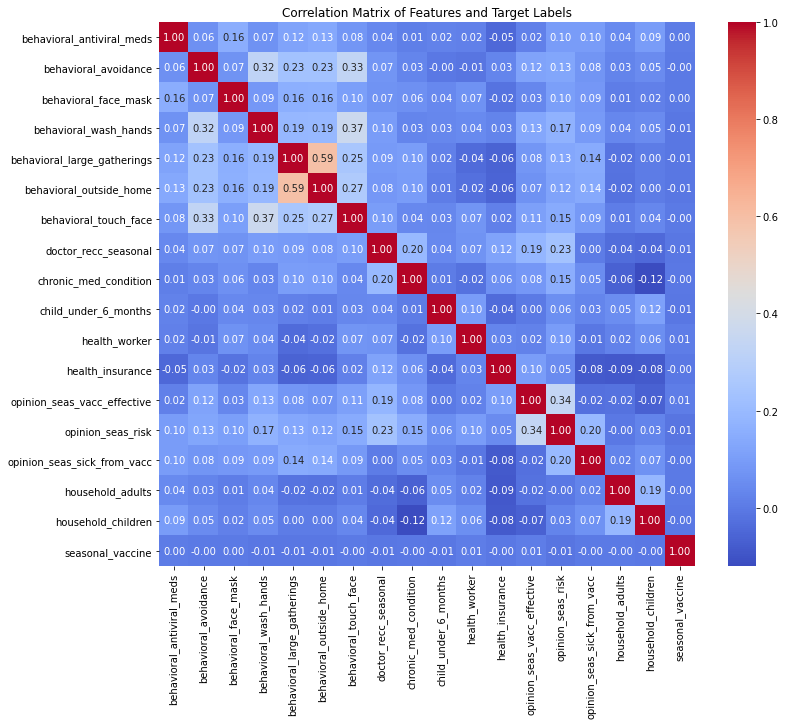

In [11]:
# Eliminating features with high correlation above 90% so as to do away with redundant features
# Calculating the correlation matrix
# Concatenate the training data (features) with the labels
combined_train_data = pd.concat([train_data, training_labels_seasonal], axis=1)

# Concatenate the testing data (features) with the labels
combined_test_data = pd.concat([test_data, training_labels_seasonal], axis=1)

# Calculate the correlation matrix for the combined DataFrame
correlation_matrix = combined_test_data.corr()

# Display the correlation matrix
#print(correlation_matrix)

# Ploting the correlation matrix using a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Features and Target Labels")
plt.show()

In [12]:
# We now remove highly correlated features (correlation > 0.9) on our training data
corr_train_matrix = train_data.corr()
threshold = 0.9
high_train_corr_features = [column for column in corr_train_matrix.columns if any(corr_train_matrix[column] > threshold)]
train_features_remaining = train_data.drop(columns=high_train_corr_features)

print(f"Features removed due to high correlation: {high_train_corr_features}\n")
print(f"Remaining features on Training data: {train_features_remaining.columns.tolist()}\n")

# We now remove highly correlated features (correlation > 0.9) on our test data
corr_test_matrix = test_data.corr()
threshold = 0.9
high_test_corr_features = [column for column in corr_test_matrix.columns if any(corr_test_matrix[column] > threshold)]
test_features_remaining = test_data.drop(columns=high_test_corr_features)

print(f"Features removed due to high correlation: {high_test_corr_features}\n")
print(f"Remaining features on Test data: {test_features_remaining.columns.tolist()}")


Features removed due to high correlation: ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']

Remaining features on Training data: ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa', 'employment_industry', 'employment_occupation']

Features removed due to high correlation: ['behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'he

In [13]:
# Handling categorical columns using one hot encoding
from sklearn.preprocessing import OneHotEncoder

train_categorical_columns = train_features_remaining.select_dtypes(include=['object']).columns

# We use one-hot encoding on categorical columns on our training data
encoded_train_data = pd.get_dummies(train_features_remaining, columns=train_categorical_columns)

print(f"Train Categorical columns include: {train_categorical_columns}")
encoded_train_data

# We use one-hot encoding on categorical columns on our test data
test_categorical_columns = test_features_remaining.select_dtypes(include=['object']).columns
encoded_test_data = pd.get_dummies(test_features_remaining, columns=test_categorical_columns)

print(f"Test Categorical columns include: {test_categorical_columns}")
# Displaying the first few rows of the encoded dataset

encoded_test_data

Train Categorical columns include: Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')
Test Categorical columns include: Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')


,age_group_18 - 34 Years,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,education_12 Years,education_< 12 Years,education_College Graduate,education_Some College,race_Black,...,employment_occupation_qxajmpny,employment_occupation_rcertsgn,employment_occupation_tfqavkke,employment_occupation_ukymxvdu,employment_occupation_uqqtjvyb,employment_occupation_vlluhbov,employment_occupation_xgwztkwe,employment_occupation_xqwwgdyp,employment_occupation_xtkaffoo,employment_occupation_xzmlyyjv
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26703,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26704,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
26705,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26706,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Model Selection

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

#Preprocess the Data
numerical_features = train_features_remaining.select_dtypes(include=['int64', 'float64']).columns
categorical_features = train_features_remaining.select_dtypes(include=['object']).columns

numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

y = training_labels_seasonal["seasonal_vaccine"]
# Spliting the Data
X_train, X_test, y_train, y_test = train_test_split(train_data, y, 
                                                    test_size=0.2, random_state=42)

# Applying pre-processing
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Training the Logistic Regression Model
model = LogisticRegression(random_state=42)


model.fit(X_train, y_train)

# Evaluating the Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.6629
Precision: 0.6429
Recall: 0.5965
F1 Score: 0.6188


C:\Users\admin\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
